In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


<h1>Preprocessing</h1>

In [3]:
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
df.drop(columns=["Unnamed: 0", "key"], inplace=True)

In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df.drop(columns=['pickup_datetime'], inplace=True)

<h1>Outliers</h1>

Number of outliers: 17166


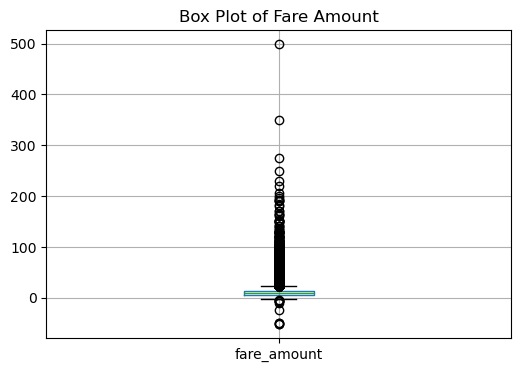

6.0
12.5


In [7]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

plt.figure(figsize=(6, 4))
df.boxplot(column='fare_amount')
plt.title('Box Plot of Fare Amount')
plt.show()
print(Q1)
print(Q3)


In [8]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]

<h1>Correlation Matrix</h1>

In [9]:
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix.round(4))


Correlation Matrix:
                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount             1.0000            0.0073          -0.0059   
pickup_longitude        0.0073            1.0000          -0.8162   
pickup_latitude        -0.0059           -0.8162           1.0000   
dropoff_longitude       0.0065            0.8329          -0.7747   
dropoff_latitude       -0.0085           -0.8463           0.7021   
passenger_count         0.0123           -0.0005          -0.0015   
year                    0.1216            0.0098          -0.0101   
month                   0.0241           -0.0047           0.0047   
day                     0.0017            0.0052          -0.0083   
hour                   -0.0207            0.0027          -0.0040   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                   0.0065           -0.0085           0.0123   
pickup_longitude              0.8329           -0.8463          -0.00

<h1>Regression Models</h1>

In [10]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("R2: ",r2_lr)

R2:  0.016670815729025623


In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("R2: ",r2_rf)

R2:  0.8254434164283484
